## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906


0:	learn: 0.9748275	total: 54.4ms	remaining: 54.4s
1:	learn: 0.9422568	total: 55.2ms	remaining: 27.5s
2:	learn: 0.9145791	total: 56ms	remaining: 18.6s
3:	learn: 0.8835489	total: 57.7ms	remaining: 14.4s
4:	learn: 0.8584422	total: 57.9ms	remaining: 11.5s
5:	learn: 0.8304544	total: 59.9ms	remaining: 9.92s
6:	learn: 0.8076761	total: 62.7ms	remaining: 8.9s
7:	learn: 0.7843459	total: 66.2ms	remaining: 8.21s
8:	learn: 0.7586559	total: 83.1ms	remaining: 9.15s
9:	learn: 0.7343236	total: 89ms	remaining: 8.81s
10:	learn: 0.7111384	total: 90.8ms	remaining: 8.16s
11:	learn: 0.6908623	total: 91.2ms	remaining: 7.51s
12:	learn: 0.6691165	total: 94.1ms	remaining: 7.14s
13:	learn: 0.6479297	total: 95.3ms	remaining: 6.71s
14:	learn: 0.6275655	total: 95.7ms	remaining: 6.29s
15:	learn: 0.6090907	total: 96.1ms	remaining: 5.91s
16:	learn: 0.5897391	total: 96.6ms	remaining: 5.58s
17:	learn: 0.5725311	total: 97.1ms	remaining: 5.3s
18:	learn: 0.5558770	total: 98.9ms	remaining: 5.11s
19:	learn: 0.5401079	total: 

93:	learn: 0.0923227	total: 153ms	remaining: 1.48s
94:	learn: 0.0901632	total: 154ms	remaining: 1.47s
95:	learn: 0.0887333	total: 154ms	remaining: 1.45s
96:	learn: 0.0867964	total: 155ms	remaining: 1.45s
97:	learn: 0.0857003	total: 156ms	remaining: 1.43s
98:	learn: 0.0842384	total: 156ms	remaining: 1.42s
99:	learn: 0.0830761	total: 157ms	remaining: 1.41s
100:	learn: 0.0816291	total: 157ms	remaining: 1.4s
101:	learn: 0.0805299	total: 158ms	remaining: 1.39s
102:	learn: 0.0789185	total: 158ms	remaining: 1.38s
103:	learn: 0.0777563	total: 159ms	remaining: 1.37s
104:	learn: 0.0769088	total: 159ms	remaining: 1.36s
105:	learn: 0.0761250	total: 160ms	remaining: 1.35s
106:	learn: 0.0746736	total: 160ms	remaining: 1.34s
107:	learn: 0.0740638	total: 161ms	remaining: 1.33s
108:	learn: 0.0730586	total: 161ms	remaining: 1.32s
109:	learn: 0.0719734	total: 162ms	remaining: 1.31s
110:	learn: 0.0709002	total: 162ms	remaining: 1.3s
111:	learn: 0.0699337	total: 163ms	remaining: 1.29s
112:	learn: 0.0687672

158:	learn: 0.0478835	total: 193ms	remaining: 1.02s
159:	learn: 0.0476443	total: 193ms	remaining: 1.01s
160:	learn: 0.0473814	total: 194ms	remaining: 1.01s
161:	learn: 0.0471638	total: 194ms	remaining: 1s
162:	learn: 0.0469498	total: 195ms	remaining: 1s
163:	learn: 0.0467617	total: 195ms	remaining: 995ms
164:	learn: 0.0466165	total: 196ms	remaining: 992ms
165:	learn: 0.0463942	total: 197ms	remaining: 988ms
166:	learn: 0.0462599	total: 197ms	remaining: 983ms
167:	learn: 0.0460519	total: 198ms	remaining: 979ms
168:	learn: 0.0458884	total: 198ms	remaining: 975ms
169:	learn: 0.0456958	total: 199ms	remaining: 970ms
170:	learn: 0.0455396	total: 199ms	remaining: 966ms
171:	learn: 0.0453531	total: 200ms	remaining: 961ms
172:	learn: 0.0452332	total: 200ms	remaining: 957ms
173:	learn: 0.0450939	total: 201ms	remaining: 953ms
174:	learn: 0.0449391	total: 201ms	remaining: 949ms
175:	learn: 0.0447591	total: 202ms	remaining: 945ms
176:	learn: 0.0446611	total: 203ms	remaining: 942ms
177:	learn: 0.0445

340:	learn: 0.0281313	total: 299ms	remaining: 579ms
341:	learn: 0.0281021	total: 312ms	remaining: 601ms
342:	learn: 0.0280382	total: 314ms	remaining: 601ms
343:	learn: 0.0279704	total: 314ms	remaining: 600ms
344:	learn: 0.0279257	total: 315ms	remaining: 598ms
345:	learn: 0.0278767	total: 316ms	remaining: 597ms
346:	learn: 0.0278328	total: 317ms	remaining: 596ms
347:	learn: 0.0277576	total: 317ms	remaining: 595ms
348:	learn: 0.0277132	total: 320ms	remaining: 596ms
349:	learn: 0.0276887	total: 321ms	remaining: 596ms
350:	learn: 0.0276415	total: 322ms	remaining: 595ms
351:	learn: 0.0275538	total: 323ms	remaining: 594ms
352:	learn: 0.0275097	total: 323ms	remaining: 592ms
353:	learn: 0.0274058	total: 324ms	remaining: 591ms
354:	learn: 0.0273507	total: 325ms	remaining: 590ms
355:	learn: 0.0272859	total: 326ms	remaining: 589ms
356:	learn: 0.0272341	total: 328ms	remaining: 590ms
357:	learn: 0.0271786	total: 329ms	remaining: 590ms
358:	learn: 0.0271360	total: 330ms	remaining: 590ms
359:	learn: 

364:	learn: 0.0267903	total: 335ms	remaining: 583ms
365:	learn: 0.0267317	total: 337ms	remaining: 584ms
366:	learn: 0.0266784	total: 338ms	remaining: 582ms
367:	learn: 0.0266436	total: 338ms	remaining: 581ms
368:	learn: 0.0265924	total: 339ms	remaining: 580ms
369:	learn: 0.0265391	total: 340ms	remaining: 578ms
370:	learn: 0.0265159	total: 340ms	remaining: 577ms
371:	learn: 0.0264268	total: 341ms	remaining: 576ms
372:	learn: 0.0263803	total: 342ms	remaining: 574ms
373:	learn: 0.0263488	total: 342ms	remaining: 573ms
374:	learn: 0.0263107	total: 343ms	remaining: 572ms
375:	learn: 0.0262576	total: 344ms	remaining: 571ms
376:	learn: 0.0262218	total: 345ms	remaining: 570ms
377:	learn: 0.0261696	total: 346ms	remaining: 569ms
378:	learn: 0.0261202	total: 347ms	remaining: 568ms
379:	learn: 0.0260812	total: 348ms	remaining: 568ms
380:	learn: 0.0260514	total: 349ms	remaining: 567ms
381:	learn: 0.0260166	total: 350ms	remaining: 566ms
382:	learn: 0.0259500	total: 351ms	remaining: 566ms
383:	learn: 

542:	learn: 0.0206946	total: 450ms	remaining: 378ms
543:	learn: 0.0206808	total: 450ms	remaining: 378ms


544:	learn: 0.0206388	total: 451ms	remaining: 376ms
545:	learn: 0.0206214	total: 452ms	remaining: 376ms
546:	learn: 0.0206015	total: 452ms	remaining: 374ms
547:	learn: 0.0205673	total: 453ms	remaining: 373ms
548:	learn: 0.0205355	total: 453ms	remaining: 372ms
549:	learn: 0.0205259	total: 454ms	remaining: 371ms
550:	learn: 0.0205039	total: 454ms	remaining: 370ms
551:	learn: 0.0204834	total: 455ms	remaining: 369ms
552:	learn: 0.0204671	total: 455ms	remaining: 368ms
553:	learn: 0.0204441	total: 455ms	remaining: 367ms
554:	learn: 0.0204321	total: 456ms	remaining: 366ms
555:	learn: 0.0203928	total: 458ms	remaining: 365ms
556:	learn: 0.0203724	total: 458ms	remaining: 364ms
557:	learn: 0.0203603	total: 459ms	remaining: 363ms
558:	learn: 0.0203498	total: 459ms	remaining: 362ms
559:	learn: 0.0203128	total: 460ms	remaining: 361ms
560:	learn: 0.0202931	total: 460ms	remaining: 360ms
561:	learn: 0.0202715	total: 461ms	remaining: 359ms
562:	learn: 0.0202490	total: 461ms	remaining: 358ms
563:	learn: 

674:	learn: 0.0180187	total: 540ms	remaining: 260ms
675:	learn: 0.0180134	total: 541ms	remaining: 259ms
676:	learn: 0.0179947	total: 542ms	remaining: 258ms


677:	learn: 0.0179791	total: 543ms	remaining: 258ms
678:	learn: 0.0179657	total: 544ms	remaining: 257ms
679:	learn: 0.0178838	total: 544ms	remaining: 256ms
680:	learn: 0.0178644	total: 545ms	remaining: 255ms
681:	learn: 0.0178505	total: 546ms	remaining: 255ms
682:	learn: 0.0178414	total: 546ms	remaining: 254ms
683:	learn: 0.0178314	total: 547ms	remaining: 253ms
684:	learn: 0.0178118	total: 548ms	remaining: 252ms
685:	learn: 0.0177879	total: 548ms	remaining: 251ms
686:	learn: 0.0177602	total: 549ms	remaining: 250ms
687:	learn: 0.0177459	total: 550ms	remaining: 249ms
688:	learn: 0.0177327	total: 550ms	remaining: 248ms
689:	learn: 0.0177180	total: 551ms	remaining: 248ms
690:	learn: 0.0176939	total: 552ms	remaining: 247ms
691:	learn: 0.0176746	total: 552ms	remaining: 246ms
692:	learn: 0.0176626	total: 553ms	remaining: 245ms
693:	learn: 0.0176329	total: 553ms	remaining: 244ms
694:	learn: 0.0176188	total: 554ms	remaining: 243ms
695:	learn: 0.0176026	total: 554ms	remaining: 242ms
696:	learn: 

892:	learn: 0.0148542	total: 649ms	remaining: 77.8ms
893:	learn: 0.0148446	total: 652ms	remaining: 77.3ms
894:	learn: 0.0148291	total: 652ms	remaining: 76.5ms
895:	learn: 0.0148145	total: 653ms	remaining: 75.8ms
896:	learn: 0.0147585	total: 654ms	remaining: 75.1ms
897:	learn: 0.0147446	total: 655ms	remaining: 74.4ms
898:	learn: 0.0147321	total: 656ms	remaining: 73.7ms
899:	learn: 0.0147147	total: 656ms	remaining: 72.9ms
900:	learn: 0.0147031	total: 657ms	remaining: 72.1ms
901:	learn: 0.0146960	total: 657ms	remaining: 71.4ms
902:	learn: 0.0146828	total: 658ms	remaining: 70.6ms
903:	learn: 0.0146626	total: 658ms	remaining: 69.9ms
904:	learn: 0.0146564	total: 659ms	remaining: 69.1ms
905:	learn: 0.0146494	total: 659ms	remaining: 68.4ms
906:	learn: 0.0146445	total: 660ms	remaining: 67.6ms
907:	learn: 0.0146286	total: 660ms	remaining: 66.9ms
908:	learn: 0.0146089	total: 661ms	remaining: 66.1ms
909:	learn: 0.0145996	total: 661ms	remaining: 65.4ms
910:	learn: 0.0145942	total: 662ms	remaining: 

941:	learn: 0.0143250	total: 678ms	remaining: 41.8ms
942:	learn: 0.0143165	total: 679ms	remaining: 41ms
943:	learn: 0.0143055	total: 680ms	remaining: 40.3ms
944:	learn: 0.0142950	total: 680ms	remaining: 39.6ms
945:	learn: 0.0142880	total: 681ms	remaining: 38.9ms
946:	learn: 0.0142693	total: 682ms	remaining: 38.1ms
947:	learn: 0.0142540	total: 682ms	remaining: 37.4ms
948:	learn: 0.0142484	total: 682ms	remaining: 36.7ms
949:	learn: 0.0142381	total: 683ms	remaining: 35.9ms
950:	learn: 0.0142286	total: 683ms	remaining: 35.2ms
951:	learn: 0.0142231	total: 684ms	remaining: 34.5ms
952:	learn: 0.0142140	total: 684ms	remaining: 33.7ms
953:	learn: 0.0142092	total: 685ms	remaining: 33ms
954:	learn: 0.0141899	total: 685ms	remaining: 32.3ms
955:	learn: 0.0141756	total: 686ms	remaining: 31.6ms
956:	learn: 0.0141584	total: 686ms	remaining: 30.8ms
957:	learn: 0.0141454	total: 687ms	remaining: 30.1ms
958:	learn: 0.0141311	total: 687ms	remaining: 29.4ms
959:	learn: 0.0141255	total: 688ms	remaining: 28.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.019076690528588347
ABC Pre-generator MAE 0.8086935972672896


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

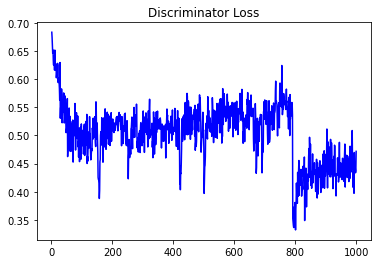

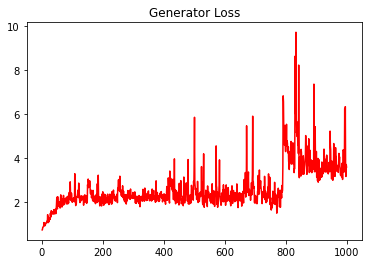

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.1366821483682309


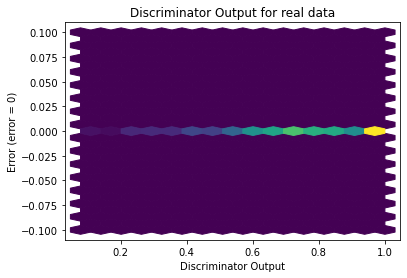

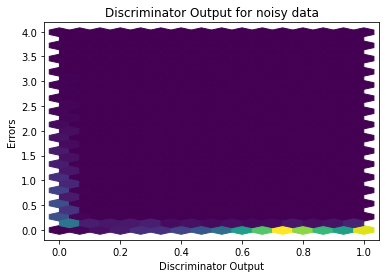

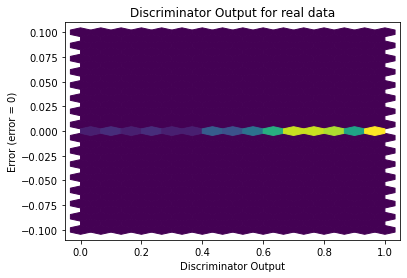

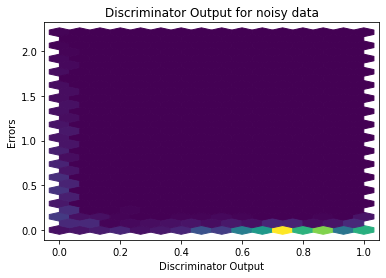

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


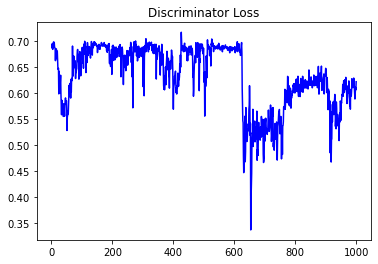

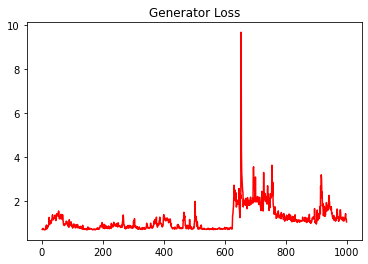

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.07742167966972505


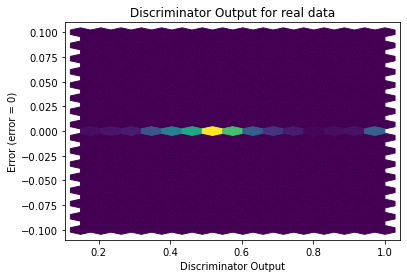

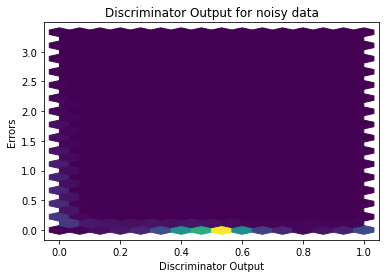

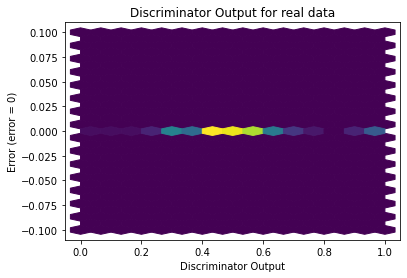

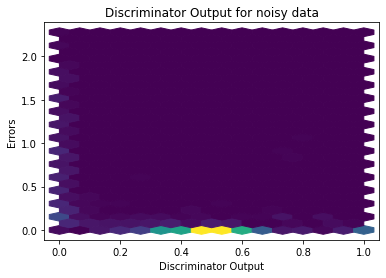

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


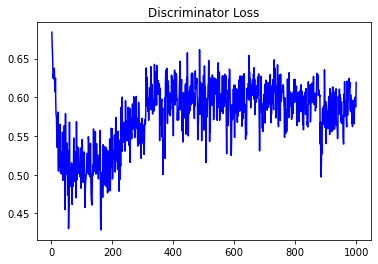

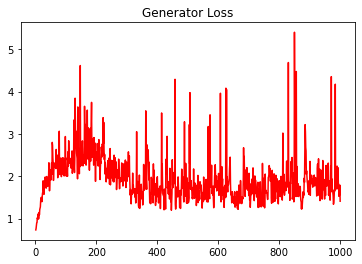

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.06667553424738444


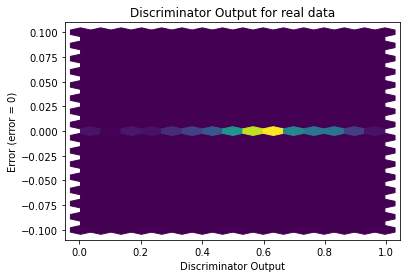

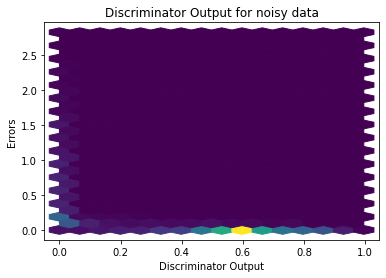

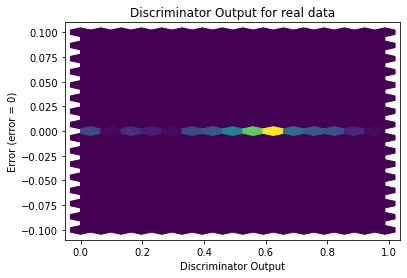

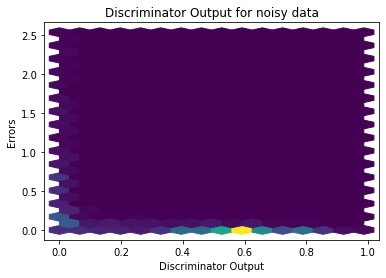

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9798]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9815]], requires_grad=True)
